In [1]:
import math
import pandas_datareader as web 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
import datetime
end = datetime.date.today()

df = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end=end)


Using TensorFlow backend.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.941502
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.238857
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.241146
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.581060
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.525522
...,...,...,...,...,...,...
2020-09-03,128.839996,120.500000,126.910004,120.879997,257599600.0,120.879997
2020-09-04,123.699997,110.889999,120.070000,120.959999,332607200.0,120.959999
2020-09-08,118.989998,112.680000,113.949997,112.820000,231366600.0,112.820000


In [4]:
#get number of rows & columns
df.shape

(1433, 6)

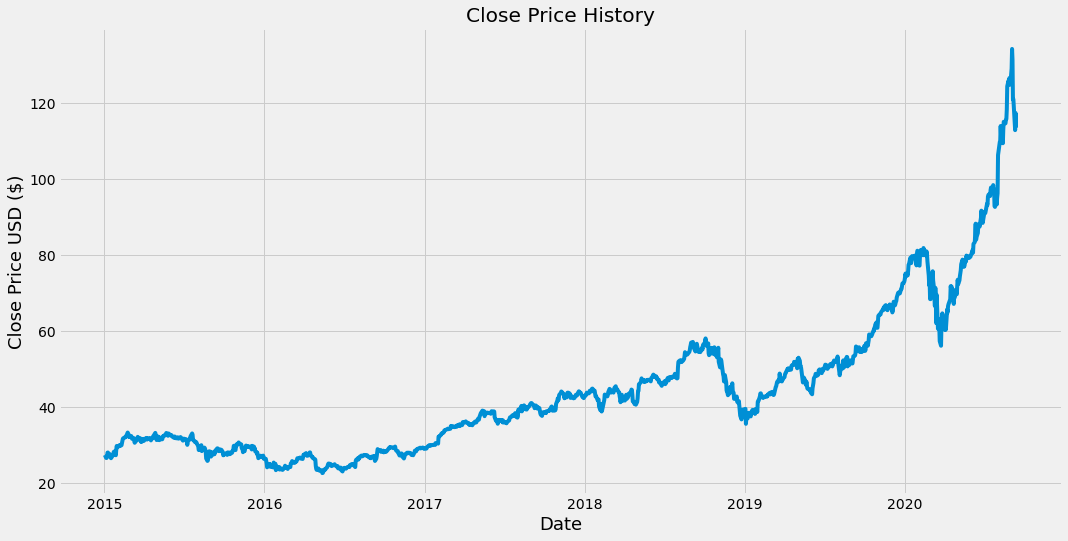

In [5]:
#visualize
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

[array([0.04254224, 0.03564229, 0.0356647 , 0.03900265, 0.04827726,
       0.0485461 , 0.04236302, 0.04453606, 0.04359516, 0.03691923,
       0.03505982, 0.04117569, 0.0430351 , 0.04941979, 0.05071914,
       0.05098796, 0.04211659, 0.05593889, 0.06398138, 0.06008336,
       0.0633765 , 0.06342132, 0.06545993, 0.06631123, 0.06404858,
       0.06581838, 0.07097093, 0.07737803, 0.08091761, 0.08230657,
       0.08398675, 0.08598057, 0.0853757 , 0.08772796, 0.09556881,
       0.09370941, 0.08613737, 0.08978898, 0.08539812, 0.08680945,
       0.08741433, 0.08557731, 0.08080561, 0.08123125, 0.08244098,
       0.07654915, 0.07146378, 0.07641472, 0.07448811, 0.07753484,
       0.08221696, 0.08542051, 0.08324747, 0.07966308, 0.0825978 ,
       0.08143288, 0.07401766, 0.07594427, 0.07372643, 0.080716  ])]
[0.07636992231957127]

[array([0.04254224, 0.03564229, 0.0356647 , 0.03900265, 0.04827726,
       0.0485461 , 0.04236302, 0.04453606, 0.04359516, 0.03691923,
       0.03505982, 0.04117569, 0.04

/home/jasminelabeille/anaconda3/envs/timeSeries/lib/python3.7/site-packages/ipykernel_launcher.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


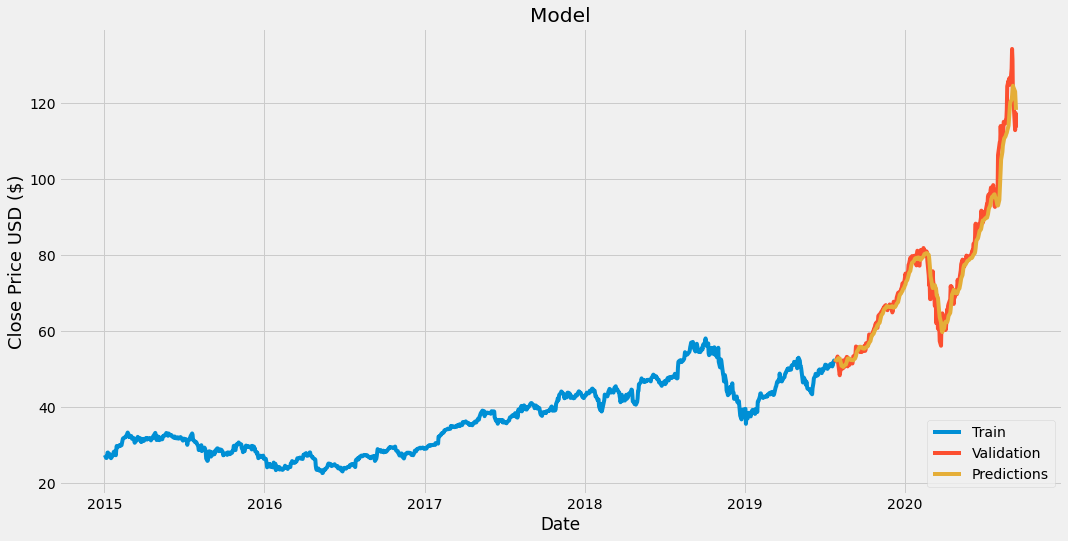

[[55.74338]]
Date
2019-09-03    51.424999
Name: Close, dtype: float64
[[1.16411972]]
i advise you to buy


In [6]:
#new df with df[close]
close_data = df.filter(['Close'])

#convert to np array
close_dataset=close_data.values

#number of rows to train model on
training_data_len = math.ceil(len(close_dataset) * .8) #pour entrainer sur 80% de notre data

training_data_len

#data scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_close_data = scaler.fit_transform(close_dataset)

scaled_close_data

# create scaled training dataset
train_close_data = scaled_close_data[0:training_data_len, :]

#split the data into x_train and y_train sets
x_train = []
y_train = []

for i in range(60, len(train_close_data)):
    x_train.append(train_close_data[i-60:i, 0])
    y_train.append(train_close_data[i,0]) #60 values from index 0 to 59
    
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

#utiliser un réseau de neurones récurrent pour prdéire le cours de la bourse #supervised DL

#converting x_train and y_train into np arrays
x_train, y_train = np.array(x_train), np.array(y_train)

x_train.shape
#x_train.shape[0] for 1st value

#reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #x_train.shape == 60
x_train.shape
#y_train = np.reshape(y_train, ())

#build the LSTM model

model = Sequential()
#50 nerons
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
#25neurons
model.add(Dense(25))
model.add(Dense(1))

#compile th model
model.compile(optimizer='adam', loss='mean_squared_error')

#training
model.fit(x_train, y_train, batch_size=1, epochs=1)

#testing dataset creation
#scaled values array from index 1084 to 1144 creation
test_data = scaled_close_data[training_data_len - 60: , :]

#x_test and y_test data sets creation
x_test= []
y_test= close_dataset[training_data_len:, :]

for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    #y_test.append()

#converting data to np array 
x_test = np.array(x_test)

print(x_test.shape)
#reshaping the data #we need a 3 dimensional shape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_test.shape

#get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unscaling the values

#model evalutation with the RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

#plotting data 
train = close_data[:training_data_len]
valid = close_data[training_data_len:]
valid['Predictions'] = predictions

valid

#data vizualisation
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

#show the valid and predicted prices
valid

#get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2018-09-03')
# new dataframe creation
new_df = apple_quote.filter(['Close'])
#getting the last 60 days closing price values & conversion df to np array
last_60_days = new_df[-60:].values

#data scaling between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#empty list creation
X_test = []
#append the 60 past days
X_test.append(last_60_days_scaled)
#convert to np array
X_test = np.array(X_test)
#reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#get predicted scaled price
pred_price = model.predict(X_test)
#unscaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-09-03', end='2019-09-03')
print(apple_quote2['Close'])

last_day = new_df[-1:].values
last_day

diif = last_day - pred_price
print(diif)

if diif < 0: #hausse
    print("i advise you to sell")
elif diif > 0: #baisse
    print("i advise you to buy")

https://towardsdatascience.com/algorithmic-trading-based-on-technical-analysis-in-python-80d445dc6943

https://github.com/erykml/medium_articles/blob/master/Quantitative%20Finance/technical_analysis_strategies.ipynb

In [ ]:
#fixing a threshold





#variables initialization
buys = []
sells = []
thresh = 0.1

start = 0
end = -1





#copy of lists creation? nope?



In [ ]:

x = -1
for ohlcv, ind in zip(ohlcv_test[start: end], tech_ind_test[start: end]):
    normalised_price_today = ohlcv[-1][0]
    normalised_price_today = np.array([[normalised_price_today]])
    price_today = y_normaliser.inverse_transform(normalised_price_today)
    predicted_price_tomorrow = np.squeeze(y_normaliser.inverse_transform(model.predict([[ohlcv], [ind]])))
    delta = predicted_price_tomorrow - price_today
    if delta > thresh:
        buys.append((x, price_today[0][0]))
    elif delta < -thresh:
        sells.append((x, price_today[0][0]))
    x += 1
print(f"buys: {len(buys)}")
print(f"sells: {len(sells)}")

In [41]:
import pickle5

In [4]:
#from zipline.api import order_target, record, symbol, set_commission, order_percent

In [5]:
#from zipline.finance import commission

In [47]:
# save model and architecture to single file
model.save("AAPL_model.h5")

In [48]:
!ls

 AAPL_model.h5			        to_import_data_in_MongoDB
 adding_MSFT_AMZN_NFLX_GOOGL_FB.ipynb  'udo systemctl stop mongod'
 build_model_on_AAPL.ipynb	        Untitled1.ipynb
 conda				        Untitled2.ipynb
 model.h5			        Untitled3.ipynb
 README.md			        Untitled.ipynb


In [49]:
!rm model.h5

In [50]:
!ls

 AAPL_model.h5			       'udo systemctl stop mongod'
 adding_MSFT_AMZN_NFLX_GOOGL_FB.ipynb   Untitled1.ipynb
 build_model_on_AAPL.ipynb	        Untitled2.ipynb
 conda				        Untitled3.ipynb
 README.md			        Untitled.ipynb
 to_import_data_in_MongoDB


127.0.0.1 - - [10/Sep/2020 12:52:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Sep/2020 12:52:09] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [10/Sep/2020 12:52:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Sep/2020 12:57:28] "GET /hello HTTP/1.1" 404 -
127.0.0.1 - - [10/Sep/2020 12:57:28] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [10/Sep/2020 12:57:32] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Sep/2020 12:57:32] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [10/Sep/2020 12:57:37] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Sep/2020 12:58:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Sep/2020 13:28:26] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Sep/2020 13:28:26] "GET /favicon.ico HTTP/1.1" 404 -


In [8]:
#conda install -c conda-forge jupyterthemes
#!pip3 install jupyterthemes
!pip3 install jupyterthemes==0.16.1

In [9]:
!jt -l #list of themes

Available Themes: 
   chesterish
   grade3
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [56]:
!jt -r
#!jt -t onedork  # + refresh the notebook # to switch into dark theme
#changing the font:
#!jt -t solarizedd -f fira -fs 115
#adjusting cell width:
#!jt -t chesterish -cellw 90% -lineh 170
#cursor width and colour:
#!jt -t oceans16 -cursc r -cursw 5
#!jt -r  # + refresh the notebook #to restore back

Reset css and font defaults in:
/home/jasminelabeille/.jupyter/custom &
/home/jasminelabeille/.local/share/jupyter/nbextensions


In [55]:
!jt -t solarized

In [11]:
#changing the font:
#!jt -t solarizedd -f fira -fs 115

In [12]:
#adjusting cell width:
#!jt -t chesterish -cellw 90% -lineh 170

In [13]:
#cursor width and colour:
#!jt -t oceans16 -cursc r -cursw 5

Plotting With The Theme

The jupyterthemes library also allows you to make appealing visualisation with its submodule jtplot. Import the module and use its style() method to change figure properties.

`#import the module
from jupyterthemes import jtplot`

the style() method can be used to beautify your visualisation

In [53]:
# another method with import

#from jupyterthemes import get_themes
#from jupyterthemes.styles import set_rb_theme
